# ResNet50 model

### ResNet50 with only 2 categories (Benign and Malign)

## Get packages

In [67]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
import albumentations as A
import cv2

from skimage.io import imread
from skimage.io import imshow
from skimage.util import crop
from skimage.transform import resize
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
     

## Paths

In [68]:
TRAIN_PATH = 'archive/classification/simple/train'
TEST_PATH = 'archive/classification/simple/test'
VALID_PATH = 'archive/classification/simple/validate'

In [69]:
input_size = (3,224,224)

## Load and Prepare Images

In [70]:
from keras.preprocessing.image import ImageDataGenerator

# train_batchsize = 4
# valid_batchsize = 4

train_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=0.6)

validation_datagen = ImageDataGenerator()
                                  

train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,  
        shuffle=True,
#          batch_size=train_batchsize,
        target_size=input_size[1:],
        class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
        VALID_PATH,  
        target_size=input_size[1:],
        shuffle=True,
#          batch_size=valid_batchsize,
        class_mode='categorical')


Found 260 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


## Import the Model

In [71]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

### Adjust the model

In [122]:
# We need to change the final layer accoding to the number of classes we have
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

# Print a summary of the model architecture
model.summary()

#Compile the model
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
#     loss=keras.losses.categorical_crossentropy, 
    optimizer=keras.optimizers.legacy.Adamax(), 
    metrics=['accuracy']
)

Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

## Train the model

In [125]:
# Se antreneaza modelul
checkpoiter = tf.keras.callbacks.ModelCheckpoint('model_resnet1_simple.h5', verbose=1, save_best_only=True)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    checkpoiter

]

results = model.fit(train_generator, 
                    validation_data=validation_generator, 
#                      validation_split=0.1, 
                    batch_size=64, 
                    epochs=25, 
                    callbacks=callbacks,
#                     steps_per_epoch=10
                   )

Epoch 1/25
9/9 [==============================] - ETA: 0s - loss: 0.6165 - accuracy: 0.8231
Epoch 1: val_loss improved from inf to 0.47753, saving model to model_resnet1_simple.h5
9/9 [==============================] - 11s 1s/step - loss: 0.6165 - accuracy: 0.8231 - val_loss: 0.4775 - val_accuracy: 0.8161
Epoch 2/25
9/9 [==============================] - ETA: 0s - loss: 0.5852 - accuracy: 0.8077
Epoch 2: val_loss did not improve from 0.47753
9/9 [==============================] - 12s 1s/step - loss: 0.5852 - accuracy: 0.8077 - val_loss: 0.4940 - val_accuracy: 0.8161
Epoch 3/25
9/9 [==============================] - ETA: 0s - loss: 0.5316 - accuracy: 0.8154
Epoch 3: val_loss did not improve from 0.47753
9/9 [==============================] - 12s 1s/step - loss: 0.5316 - accuracy: 0.8154 - val_loss: 0.4960 - val_accuracy: 0.8161
Epoch 4/25
9/9 [==============================] - ETA: 0s - loss: 0.5134 - accuracy: 0.8154
Epoch 4: val_loss did not improve from 0.47753
9/9 [=================

## Results

In [126]:
print('Accuracy Score = ',np.max(results.history['val_accuracy']))
print('Loss Score = ',np.min(results.history['val_loss']))

Accuracy Score =  0.8160919547080994
Loss Score =  0.47543811798095703


### During training

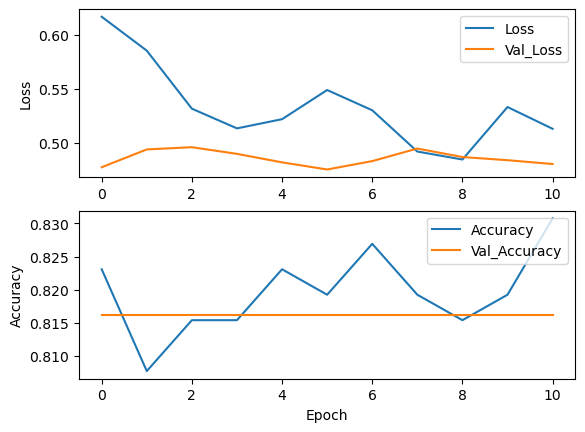

In [127]:
plt.figure()
plt.subplot(211)
loss_train_curve = results.history["loss"]
loss_val_curve = results.history["val_loss"]
plt.plot(loss_train_curve, label = "Loss")
plt.plot(loss_val_curve, label = "Val_Loss")
plt.legend(loc = 'upper right')
plt.ylabel("Loss")


plt.subplot(212)
acc_train_curve = results.history["accuracy"]
acc_val_curve = results.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Accuracy")
plt.plot(acc_val_curve, label = "Val_Accuracy")
plt.legend(loc = 'upper right')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

## Test the model

In [ ]:
# test_batch_size = 1

# num_of_test_samples = 1

target_names = list(train_generator.class_indices.keys())
print(target_names)
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=input_size[1:],
#     batch_size=test_batchsize,
    shuffle=True,
class_mode='categorical')

### Make prediction

['benign', 'malign']
Found 8 images belonging to 2 classes.
6/6 [==============================] - 5s 803ms/step


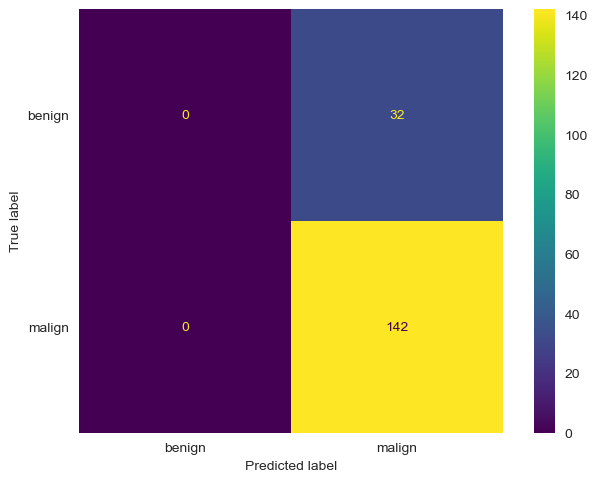

In [36]:
test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)
# print(validation_generator.batch_size)

predictions = model.predict(validation_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Y_pred = model.predict(test_generator, num_of_test_samples // test_batch_size+1)
y_pred = np.argmax(predictions, axis=1)


# print('Confusion Matrix')
# print(confusion_matrix(test_generator.classes, y_pred))
# print('Classification Report')
# print(classification_report(test_generator.classes, y_pred, target_names=target_names))

cm = confusion_matrix(validation_generator.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot()
plt.grid(False)
plt.show()